### Imports

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from pprint import pprint

from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Nesta seccção iremos comparar o comportamento de diversos ML models no conjunto de dados, analisar o comportamento dos
algoritmos calculando métricas de erro apropriadas e usando métodos de estimação do erro adequado. Por último pretendemos apresentar o melhor modelo.

In [2]:
path="C:\\Users\\guilh\\OneDrive - Universidade de Aveiro\\Guilherme\\dataset.csv"
data=pd.read_csv(path)
print(data)

               Y  Parametro 0  Parametro 1  Parametro 2  Parametro 3  \
0       7.693530     5.291146     5.040387     5.291146     0.908336   
1       7.778053     5.291146     5.040387     5.291146     0.908336   
2      -1.198505     5.291146     5.040387     5.291146     0.908336   
3       2.595684     5.291146     5.040387     5.291146     0.908336   
4      -5.139971     5.291146     5.040387     5.291146     0.908336   
...          ...          ...          ...          ...          ...   
19585  10.223066    -0.188995    -0.198397    -0.188995     1.494725   
19586  20.551627    -0.188995    -0.198397    -0.188995     1.494725   
19587  12.190316    -0.188995    -0.198397    -0.188995     1.494725   
19588  23.438547    -0.188995    -0.198397    -0.188995     1.494725   
19589  12.223791    -0.188995    -0.198397    -0.188995     1.494725   

       Parametro 4  Parametro 5  Parametro 6  Parametro 7  Parametro 8  ...  \
0         2.514969     5.291146     5.291146    -1.49200

In [3]:
path2="C:\\Users\\guilh\\OneDrive - Universidade de Aveiro\\Guilherme\\combinacao.csv"
combinacao=pd.read_csv(path2)
combinacao

,combinações
0,5-FU ABT-888
1,5-FU ABT-888
2,5-FU ABT-888
3,5-FU ABT-888
4,5-FU ABT-888
...,...
19585,ZOLINZA TOPOTECAN
19586,ZOLINZA TOPOTECAN
19587,ZOLINZA TOPOTECAN
19588,ZOLINZA TOPOTECAN


In [4]:
data["combinacao"]=combinacao["combinações"]
data

,Y,Parametro 0,Parametro 1,Parametro 2,Parametro 3,Parametro 4,Parametro 5,Parametro 6,Parametro 7,Parametro 8,...,MACCSKey drug2 150,MACCSKey drug2 151,MACCSKey drug2 152,MACCSKey drug2 153,MACCSKey drug2 154,MACCSKey drug2 155,MACCSKey drug2 157,MACCSKey drug2 159,MACCSKey drug2 160,combinacao
0,7.693530,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,5-FU ABT-888
1,7.778053,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,5-FU ABT-888
2,-1.198505,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,5-FU ABT-888
3,2.595684,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,5-FU ABT-888
4,-5.139971,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,5-FU ABT-888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19585,10.223066,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,ZOLINZA TOPOTECAN
19586,20.551627,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,ZOLINZA TOPOTECAN
19587,12.190316,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,ZOLINZA TOPOTECAN
19588,23.438547,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,ZOLINZA TOPOTECAN


Dividir o dataset em treino, teste, validação - 70,15,15 respetivamente. COm particular atenção para a distribuição estratificada de combinação de drogas

In [8]:
from sklearn.model_selection import train_test_split

X = data.drop('Y', axis=1)
y = data['Y']
combinacoes = data['combinacao']

X_train, X_temp, y_train, y_temp, comb_train, comb_temp = train_test_split(
    X, y, combinacoes, test_size=0.3, random_state=42, stratify=combinacoes
)

X_val, X_test, y_val, y_test, comb_val, comb_test = train_test_split(
    X_temp, y_temp, comb_temp, test_size=0.5, random_state=42, stratify=comb_temp
)

# Resultado
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_val:", X_val.shape)
print("Tamanho de X_test:", X_test.shape)


Tamanho de X_train: (13713, 9591)
Tamanho de X_val: (2938, 9591)
Tamanho de X_test: (2939, 9591)


,Parametro 0,Parametro 1,Parametro 2,Parametro 3,Parametro 4,Parametro 5,Parametro 6,Parametro 7,Parametro 8,Parametro 9,...,MACCSKey drug2 150,MACCSKey drug2 151,MACCSKey drug2 152,MACCSKey drug2 153,MACCSKey drug2 154,MACCSKey drug2 155,MACCSKey drug2 157,MACCSKey drug2 159,MACCSKey drug2 160,combinacao
17259,-0.188995,-0.198397,-0.188995,0.908336,2.514969,-0.188995,-0.188995,-1.431361,-0.674146,1.472677,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,TEMOZOLOMIDE TOPOTECAN
3558,-0.188995,-0.198397,-0.188995,-0.957911,-0.397619,-0.188995,-0.188995,0.107895,1.143195,-1.446231,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,DEXAMETHASONE MK-2206
4148,-0.188995,-0.198397,-0.188995,-0.957911,-0.397619,-0.188995,-0.188995,0.790965,-0.674146,-1.275508,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,DOXORUBICIN ERLOTINIB
6810,-0.188995,-0.198397,-0.188995,0.908336,-0.397619,-0.188995,-0.188995,0.107895,-0.674146,1.164951,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,L778123 DINACICLIB
17402,-0.188995,-0.198397,-0.188995,0.908336,-0.397619,-0.188995,-0.188995,0.253555,-0.674146,-0.218426,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,TOPOTECAN SORAFENIB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16871,-0.188995,-0.198397,-0.188995,0.908336,2.514969,-0.188995,-0.188995,-1.431361,-0.674146,1.472677,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,TEMOZOLOMIDE ERLOTINIB
12619,-0.188995,-0.198397,-0.188995,-0.957911,-0.397619,-0.188995,-0.188995,0.107895,1.143195,-0.218426,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,MK-5108 ABT-888
9135,-0.188995,-0.198397,-0.188995,0.908336,-0.397619,-0.188995,-0.188995,-0.183248,-0.674146,1.654353,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,METHOTREXATE GELDANAMYCIN
8717,-0.188995,-0.198397,-0.188995,-0.957911,-0.397619,-0.188995,-0.188995,-1.492008,-0.674146,1.164951,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,METFORMIN SORAFENIB


Verificar que a proporção de combincação de drogas no dataset validação e teste é a mesma:

In [10]:
contagem_combinacao = X_val['combinacao'].value_counts()

contagem_especifica = contagem_combinacao.get("ABT-888 BEZ-235", 0)

print(f"A combinação 'ABT-888 BEZ-235' aparece {contagem_especifica} vezes na coluna 'combinacao'.")


A combinação 'ABT-888 BEZ-235' aparece 6 vezes na coluna 'combinacao'.


In [11]:
# Supondo que 'combinacao' é o nome da coluna
contagem_combinacao = X_test['combinacao'].value_counts()

# Agora você pode verificar a contagem específica para a combinação "ABT-888 BEZ-235"
contagem_especifica = contagem_combinacao.get("ABT-888 BEZ-235", 0)

print(f"A combinação 'ABT-888 BEZ-235' aparece {contagem_especifica} vezes na coluna 'combinacao'.")

A combinação 'ABT-888 BEZ-235' aparece 5 vezes na coluna 'combinacao'.


Para realizar o ML , necessitamos de retirar a coluna das combinações de drogas do dataset treino, validação e teste

In [13]:
X_train = X_train.iloc[:, :-1]
X_val = X_val.iloc[:, :-1]
X_test = X_test.iloc[:, :-1]

,Parametro 0,Parametro 1,Parametro 2,Parametro 3,Parametro 4,Parametro 5,Parametro 6,Parametro 7,Parametro 8,Parametro 9,...,MACCSKey drug2 149,MACCSKey drug2 150,MACCSKey drug2 151,MACCSKey drug2 152,MACCSKey drug2 153,MACCSKey drug2 154,MACCSKey drug2 155,MACCSKey drug2 157,MACCSKey drug2 159,MACCSKey drug2 160
18766,-0.188995,-0.198397,-0.188995,-0.957911,-0.397619,-0.188995,-0.188995,1.714906,-0.674146,0.574116,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
13559,-0.188995,-0.198397,-0.188995,-0.957911,-0.397619,-0.188995,-0.188995,0.534762,0.383091,-0.218426,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
751,-0.188995,-0.198397,-0.188995,0.908336,-0.397619,-0.188995,-0.188995,-1.018124,-0.674146,0.574116,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4187,-0.188995,-0.198397,-0.188995,-0.957911,-0.397619,-0.188995,-0.188995,0.790965,-0.674146,-1.275508,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
4067,-0.188995,-0.198397,-0.188995,-0.957911,-0.397619,-0.188995,-0.188995,0.790965,-0.674146,-1.275508,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16553,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,0.107895,1.143195,0.574116,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
8228,-0.188995,-0.198397,-0.188995,-0.957911,-0.397619,-0.188995,-0.188995,-1.492008,-0.674146,1.164951,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5241,-0.188995,-0.198397,-0.188995,-0.957911,-0.397619,-0.188995,-0.188995,1.012839,-0.674146,-1.446231,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
16518,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,0.107895,1.143195,0.574116,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0


In [17]:
X_train.to_csv("X_train.csv", index=False)
X_val.to_csv("X_val.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_val.to_csv("y_val.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

# Modelos de ML
A nossa task, prever o nivel de sinergia entre duas drogas, o que se trata de um problema de regressão, logo só poderemos utilizar modelos que se baseiem em regressão.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

models_to_try = [
    ('Linear Regression', LinearRegression()),
    #('KNN', KNeighborsRegressor()),
    #('Decision Tree', DecisionTreeRegressor()),
    #('Random Forest', RandomForestRegressor())
    #('SVM', SVR()),  # Support Vector Machine para regressão
    #('AdaBoost', AdaBoostRegressor())
]

results = []

for model_name, model in models_to_try:
    # Treinamento do modelo
    model.fit(X_train, y_train)
    
    # Avaliação do desempenho no conjunto de validação
    y_test_pred = model.predict(X_test)
    
    # Cálculo das métricas
    mse_val = mean_squared_error(y_test, y_test_pred)
    r2_val = r2_score(y_test, y_test_pred)
    mae_val = mean_absolute_error(y_test, y_test_pred)
    
    # Armazenar resultados em um dicionário
    model_results = {
        'Model': model_name,
        'Mean Squared Error': mse_val,
        'R-squared': r2_val,
        'Mean Absolute Error': mae_val,
    }
    
    # Adicionar os resultados à lista
    results.append(model_results)

    # Exibição dos resultados
    print(f'{model_name} - Mean Squared Error (Validation): {mse_val:.2f}')

# Converter a lista de resultados em um DataFrame do pandas (opcional)
results_df = pd.DataFrame(results)

# Encontrar o modelo com o menor MSE
best_model_df = results_df.loc[results_df['Mean Squared Error'].idxmin()]

# Exibir o melhor modelo
print(f'\nMelhor Modelo Escolhido:')
print(best_model_df)


Linear Regression - Mean Squared Error (Validation): 250.91

Melhor Modelo Escolhido:
Model                  Linear Regression
Mean Squared Error            250.912806
R-squared                       0.256024
Mean Absolute Error              11.4644
Name: 0, dtype: object


In [34]:
results

[{'Model': 'Linear Regression',
  'Mean Squared Error': 408.2329743671923,
  'R-squared': 0.12235183198607524,
  'Mean Absolute Error': 14.072671672404226},
 {'Model': 'KNN',
  'Mean Squared Error': 391.9258701801778,
  'R-squared': 0.1574099997823699,
  'Mean Absolute Error': 13.335788427795746},
 {'Model': 'Decision Tree',
  'Mean Squared Error': 566.4933787850647,
  'R-squared': -0.21788759679058023,
  'Mean Absolute Error': 15.047101666279918},
 {'Model': 'Random Forest',
  'Mean Squared Error': 251.75989428147605,
  'R-squared': 0.45874874429723667,
  'Mean Absolute Error': 10.177774430809903}]

# ensemble voting

In [6]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Escolha os modelos que deseja incluir no ensemble
model_linear = LinearRegression()
model_knn =  KNeighborsRegressor()
model_dt = DecisionTreeRegressor()

# Crie um ensemble utilizando a média das previsões dos modelos
ensemble_model = VotingRegressor(estimators=[
    ('Linear Regression', model_linear),
    ('KNN', model_knn),
    ('Decision Tree', model_dt)
])

# Treine o ensemble
ensemble_model.fit(X_train, y_train)

# Faça previsões usando o ensemble
y_pred_ensemble = ensemble_model.predict(X_test)

# Avalie o desempenho do ensemble
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)

# Exiba os resultados do ensemble
print(f'Ensemble - Mean Squared Error (Validation): {mse_ensemble:.2f}')
print(f'Ensemble - R-squared (Validation): {r2_ensemble:.2f}')
print(f'Ensemble - Mean Absolute Error (Validation): {mae_ensemble:.2f}')


Ensemble - Mean Squared Error (Validation): 326.10
Ensemble - R-squared (Validation): 0.30
Ensemble - Mean Absolute Error (Validation): 11.94


# Exploração de hiperparametros do melhor modelo

A nossa estratégia passou por treinar e avaliar um conjunto de modelos tendo em conta o dataset treino e teste , para depois utilizar o dataset da validação para otimizar os parametros do modelo que anteriormente deu melhores resultados. 

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


param_grid = {'n_estimators': [10, 50], 'max_depth': [None, 10], 'min_samples_split': [2, 5]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_val, y_val)
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

y_pred_test_final = best_model.predict(X_test)
mse_test_final =mean_squared_error(y_test, y_pred_test_final)
r2_test_final = r2_score(y_test, y_pred_test_final)
mae_test_final= mean_absolute_error(y_test, y_pred_test_final)
print(f'Mean Squared Error (Test - Final): {mse_test_final:.2f}')
print(f'Mean Absolute Error (Test - Final): {mae_test_final:.2f}')
print(f' Rsquared (Test - Final): {r2_test_final:.2f}')


Mean Squared Error (Test - Final): 246.99
Mean Absolute Error (Test - Final): 10.14
 Rsquared (Test - Final): 0.47


In [8]:
best_model

RandomForestRegressor(min_samples_split=5, n_estimators=50)

## Model interpretation

scikit-learn provides multiple methods for model interpretation. Here we will see feature importance and permutation importance.


In [10]:
from sklearn.feature_selection import VarianceThreshold

# Supondo que X é o seu conjunto de características
selector = VarianceThreshold(threshold=0.000000000001)
selected_X = selector.fit_transform(X)
selected_columns = X.columns[selector.get_support()]

print("Shape do conjunto de características após aplicar o Variance Threshold:", selected_X.shape)
print("Colunas selecionadas:", selected_columns)

Shape do conjunto de características após aplicar o Variance Threshold: (19866, 8774)
Colunas selecionadas: Index(['drug1 MolWt', 'drug1 HeavyAtomMolWt', 'drug1 ExactMolWt',
       'drug1 BertzCT', 'drug1 TPSA', 'morgan drug1 15', 'morgan drug1 33',
       'morgan drug1 36', 'morgan drug1 64', 'morgan drug1 80',
       ...
       'Parametro 8775', 'Parametro 8776', 'Parametro 8777', 'Parametro 8778',
       'Parametro 8779', 'Parametro 8780', 'Parametro 8781', 'Parametro 8782',
       'Parametro 8783', 'Parametro 8784'],
      dtype='object', length=8774)


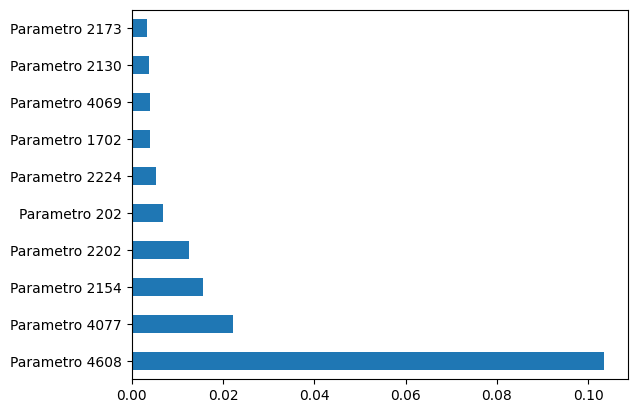

In [11]:
# Model interpretation
# feature importance

rf = best_model
rf.fit(X_train, y_train)
rf.feature_importances_

# plot feature importance
importances = pd.Series(rf.feature_importances_, index=selected_columns)  #este selected columns vão ser as selecionadas na feature selection, mas como não está importado não lê esta variável
importances.nlargest(10).plot(kind='barh')
plt.show()

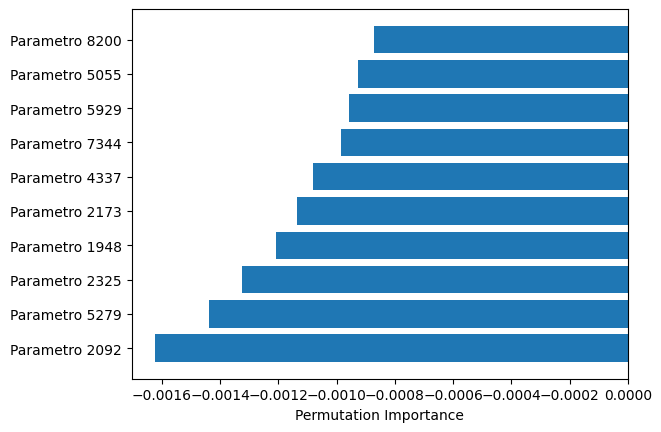

In [12]:
# feature importance based on permutation importance

perm_importance = permutation_importance(rf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(selected_columns[sorted_idx[:10]], perm_importance.importances_mean[sorted_idx[:10]])
plt.xlabel("Permutation Importance")
plt.show()

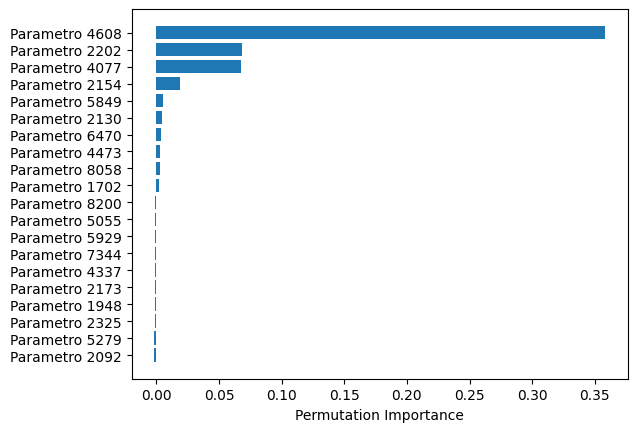

In [13]:

pos_neg_idx = np.concatenate((sorted_idx[:10], sorted_idx[-10:]))
plt.barh(selected_columns[pos_neg_idx], perm_importance.importances_mean[pos_neg_idx])
plt.xlabel("Permutation Importance")
plt.show()